In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Problem 01 (25 points)
1.1 (10 points) Create a Pandas Series object with the values given by the twelve months: "January", "February", ..., "December", and with the indexes given by the first twelve natural numbers: 1, 2, ..., 12. Then, print the slice ranging from June to September (included).

1.2 (10 points) Create a Pandas DataFrame with the indexes $0, 1, \dots, 9$ and column labels "col0", "col1", ..., "col9". Each value of the dateframe with the index $i$ and with the column "colj" should be assigned the value $50 \times i + j$. Then, print the subset of the data frame corresponding to indexes 2 to 5 (included) within the two columns "col6" and "col8".

1.3 (5 points) In the original data frame created in 1.2, remove all rows for which the corresponding value in the column "col7" is smaller than 100 or bigger than 350.

In [3]:
# P1.1
months = pd.Series(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
                  index = range(1, 13))
print(months.loc[6:9])

6         June
7         July
8       August
9    September
dtype: object


In [4]:
# P1.2
df = pd.DataFrame(index = range(10), columns = ['col' + str(x) for x in range(10)])

for i in range(10):
    for j in range(10):
        df.iloc[i,j] = 50*i + j
        
print(df.loc[2:5,['col6', 'col8']])

  col6 col8
2  106  108
3  156  158
4  206  208
5  256  258


In [6]:
# P1.3
df = df[(df['col7'] >= 100) & (df['col7'] <= 350)]
df

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9
2,100,101,102,103,104,105,106,107,108,109
3,150,151,152,153,154,155,156,157,158,159
4,200,201,202,203,204,205,206,207,208,209
5,250,251,252,253,254,255,256,257,258,259
6,300,301,302,303,304,305,306,307,308,309


### Problem 02 (25 points)

Load the dataset "IMDB-Movie-Data.csv" into a Pandas DataFrame with the index equal to a title of a movie title, while dopping all duplicated rows, using the follwoing command:  ```df_movies = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title").drop_duplicates()```

Then:


2.1 (10 points) Print the number of rows for which the column "Metascore" is `NaN`.

2.2 (5 points) Print the ratio of missing value count over number of rows in the dataseet: what is the fraction of missing values for the column "Metascore".

2.3 (5 points) Print the min, mean, max, median for the column "Metascore".

2.4 (5 points) Print the median for the column "Metascore" after replacing `NaN` by the mean of this column.

In [7]:
df_movies = pd.read_csv("IMDB-Movie-Data.csv", index_col="Title").drop_duplicates()
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [8]:
# P2.1
print(df_movies['Metascore'].isna().sum())

64


In [14]:
# P2.2
print(round(df_movies['Metascore'].isna().sum()/df_movies['Metascore'].isna().count(), 3))

0.064


In [15]:
# P2.3
print(df_movies.agg({'Metascore': ['min', 'mean', 'max', 'median']}))

         Metascore
min      11.000000
mean     58.985043
max     100.000000
median   59.500000


In [9]:
# P2.4
df_movies['Metascore'].fillna(df_movies['Metascore'].mean(), inplace = True)
print(df_movies['Metascore'].median())

58.98504273504273


### Problem 03 (50 points)
Load the dataset "StudentsPerformance.csv" into a Pandas DataFrame, then:

3.1 (5 points) Print the number of unique groups in this data set.

3.2 (10 points) For each group print the number of female and the number of male members.

3.3 (10 points) Plot the histogram over `math_score` for group A and set the number of bins to 50.

3.4 (10 points) Show three `2D` scatter plots where the axes correspond to each combination of math, reading, and	writing scores. In other words, the three plots will have the following axes: 
    
Plot 1: x = "math score", y = "reading score"

Plot 2: x = "math score", y = "writing score"

Plot 3: x = "reading score", y = "writing score"

3.5 (15 points) Normalize each of the three columns `math score`, `reading score`, `writing score` by subtracting its mean value and dividing by its standard deviation, and assign the results to three new columns called `math_score_norm`, `reading_score_norm`, and `writing_score_norm`, respectively.

Perform the same task as in 3.4 (= show three `2D` scatter plots) on these newly formed columns.  

In [16]:
students = pd.read_csv("StudentsPerformance.csv")
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   group                    1000 non-null   object 
 2   test preparation course  1000 non-null   object 
 3   math score               858 non-null    float64
 4   reading score            1000 non-null   int64  
 5   writing score            904 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.0+ KB


In [17]:
# P3.1
print(students['group'].nunique())

5


In [18]:
# P3.2
print(students.groupby(['group', 'gender'])['gender'].count())

group    gender
group A  female     36
         male       53
group B  female    104
         male       86
group C  female    180
         male      139
group D  female    129
         male      133
group E  female     69
         male       71
Name: gender, dtype: int64


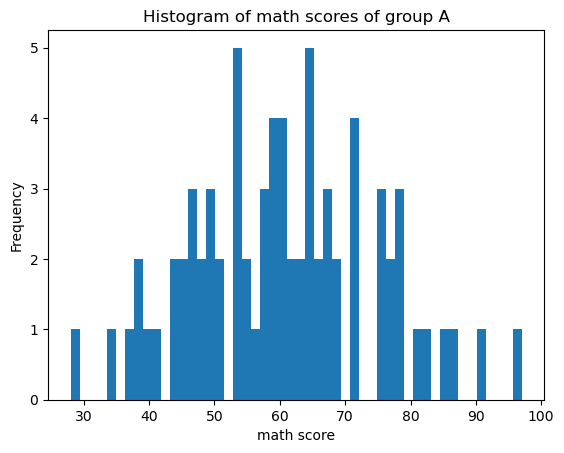

In [22]:
# P3.3
students[students['group'] == 'group A']['math score'].plot(kind = 'hist', bins = 50)
plt.title('Histogram of math scores of group A')
plt.xlabel('math score');

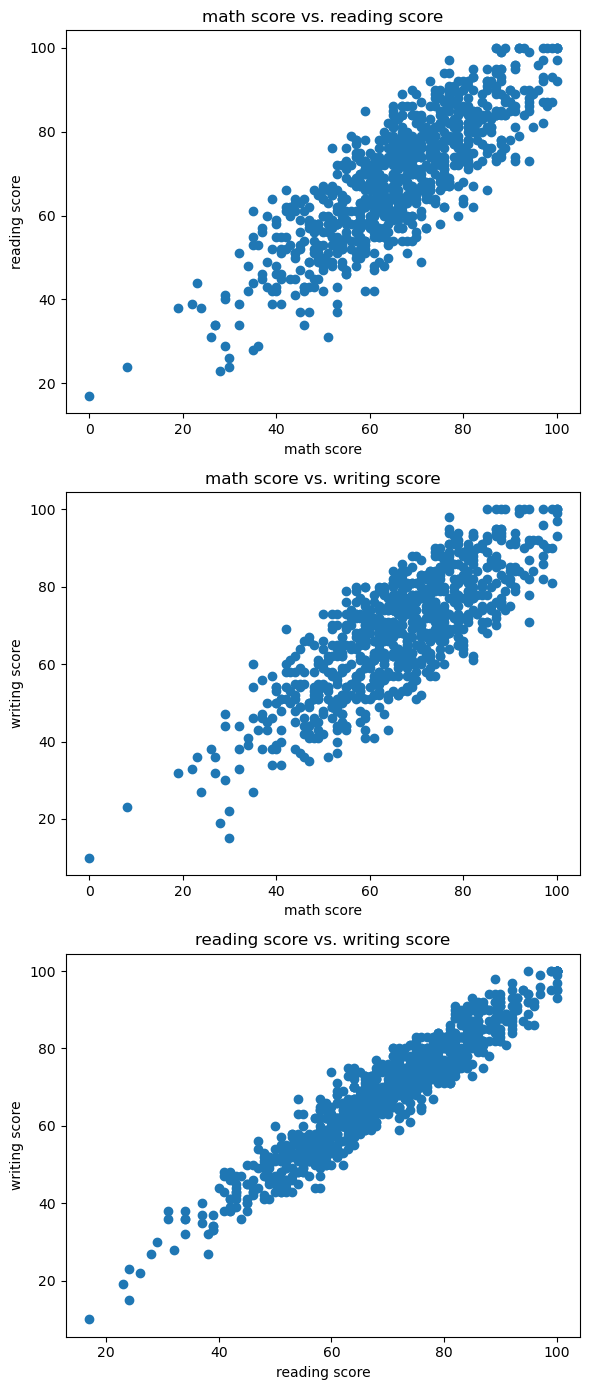

In [27]:
# P3.4
f, ax = plt.subplots(nrows=3, ncols=1, figsize = (6, 14), tight_layout = True)

ax[0].scatter(students['math score'], students['reading score'])
ax[0].set(title='math score vs. reading score', xlabel='math score', ylabel='reading score')

ax[1].scatter(students['math score'], students['writing score'])
ax[1].set(title='math score vs. writing score', xlabel='math score', ylabel='writing score')

ax[2].scatter(students['reading score'], students['writing score'])
ax[2].set(title='reading score vs. writing score', xlabel='reading score', ylabel='writing score');

In [25]:
# P3.5
students['math_score_norm'] = (students['math score'] - students['math score'].mean())/students['math score'].std()
students['reading_score_norm'] = (students['reading score'] - students['reading score'].mean())/students['reading score'].std()
students['writing_score_norm'] = (students['writing score'] - students['writing score'].mean())/students['writing score'].std()

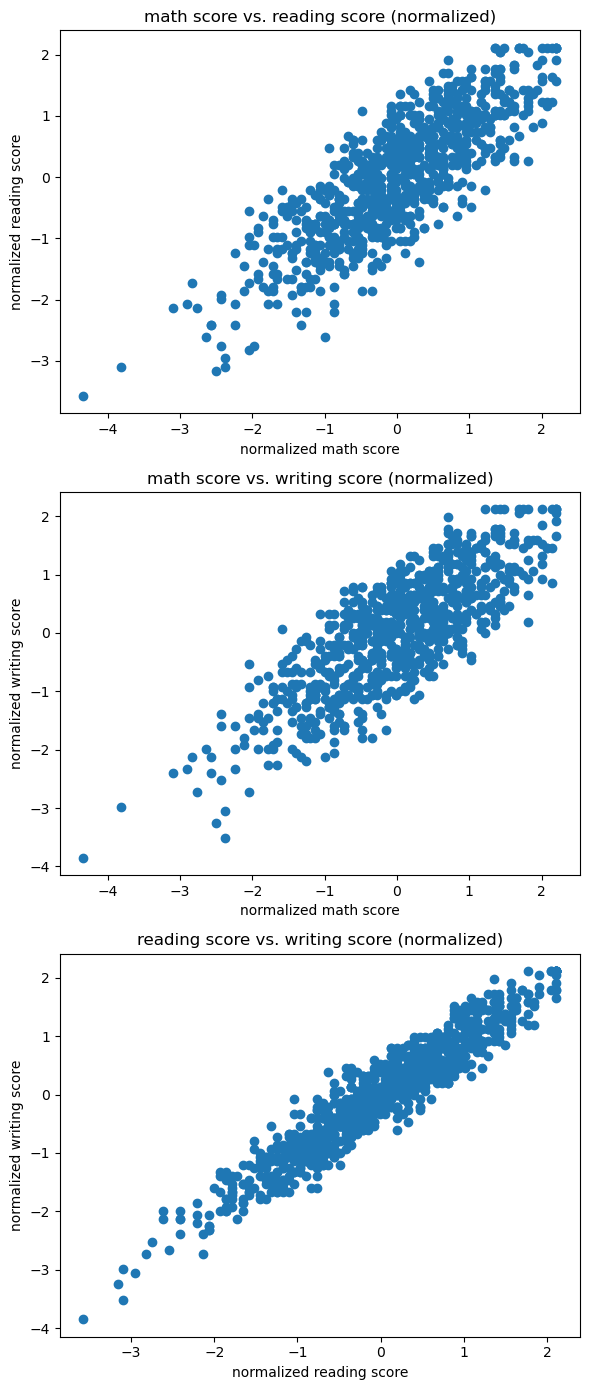

In [26]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize = (6, 14), tight_layout = True)

ax[0].scatter(students['math_score_norm'], students['reading_score_norm'])
ax[0].set(title='math score vs. reading score (normalized)', xlabel='normalized math score', ylabel='normalized reading score')

ax[1].scatter(students['math_score_norm'], students['writing_score_norm'])
ax[1].set(title='math score vs. writing score (normalized)', xlabel='normalized math score', ylabel='normalized writing score')

ax[2].scatter(students['reading_score_norm'], students['writing_score_norm'])
ax[2].set(title='reading score vs. writing score (normalized)', xlabel='normalized reading score', ylabel='normalized writing score');